In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataF = pd.read_csv(r"../data/raw/Patients_hopital.csv",  sep=';')
dataF.head()

,Identifiant_patient,GENRE,AGE,TAILLE,POIDS,TTAILLE,SYS,DIA,IMC,JMBG,COUD,POIGN,BRAS
0,I0001,0,58,179.8,76.7,90.6,125,78,23.8,42.5,7.7,6.4,31.9
1,I0002,0,22,168.1,65.4,78.1,107,54,23.2,40.2,7.6,6.2,31.0
2,I0003,0,32,182.1,81.3,96.5,126,81,24.6,44.4,7.3,5.8,32.7
3,I0004,0,31,174.5,79.7,87.7,110,68,26.2,42.8,7.5,5.9,33.4
4,I0005,0,28,171.7,69.2,87.1,110,66,23.5,40.0,7.1,6.0,30.1


In [3]:
dataF = dataF.drop('Identifiant_patient', axis=1)
dataF.columns

Index(['GENRE', 'AGE', 'TAILLE', 'POIDS', 'TTAILLE', 'SYS', 'DIA', 'IMC',
       'JMBG', 'COUD', 'POIGN', 'BRAS'],
      dtype='object')

In [4]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GENRE    80 non-null     int64  
 1   AGE      80 non-null     int64  
 2   TAILLE   80 non-null     float64
 3   POIDS    80 non-null     float64
 4   TTAILLE  80 non-null     float64
 5   SYS      80 non-null     int64  
 6   DIA      80 non-null     int64  
 7   IMC      80 non-null     float64
 8   JMBG     80 non-null     float64
 9   COUD     80 non-null     float64
 10  POIGN    80 non-null     float64
 11  BRAS     80 non-null     float64
dtypes: float64(8), int64(4)
memory usage: 7.6 KB


In [5]:
dataF.describe()

,GENRE,AGE,TAILLE,POIDS,TTAILLE,SYS,DIA,IMC,JMBG,COUD,POIGN,BRAS
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.500000,34.350000,167.040000,72.292500,88.158750,114.850000,70.325000,25.868750,40.71750,6.835000,5.433750,31.272500
std,0.503155,13.175639,9.803882,15.816637,13.229108,14.671163,10.790027,4.959216,3.83712,0.710874,0.501881,4.392542
min,0.000000,12.000000,144.800000,42.800000,66.700000,89.000000,41.000000,17.700000,27.00000,5.400000,4.200000,23.000000
25%,0.000000,23.750000,160.225000,61.200000,76.725000,107.000000,64.000000,22.525000,38.92500,6.300000,5.075000,27.750000
50%,0.500000,32.000000,168.000000,73.000000,87.700000,113.000000,71.000000,25.350000,40.85000,6.900000,5.400000,31.500000
75%,1.000000,42.500000,173.500000,81.375000,97.325000,124.000000,79.000000,28.550000,42.95000,7.400000,5.800000,34.000000
max,1.000000,73.000000,193.500000,116.100000,126.500000,181.000000,102.000000,44.900000,48.60000,8.300000,6.700000,43.800000


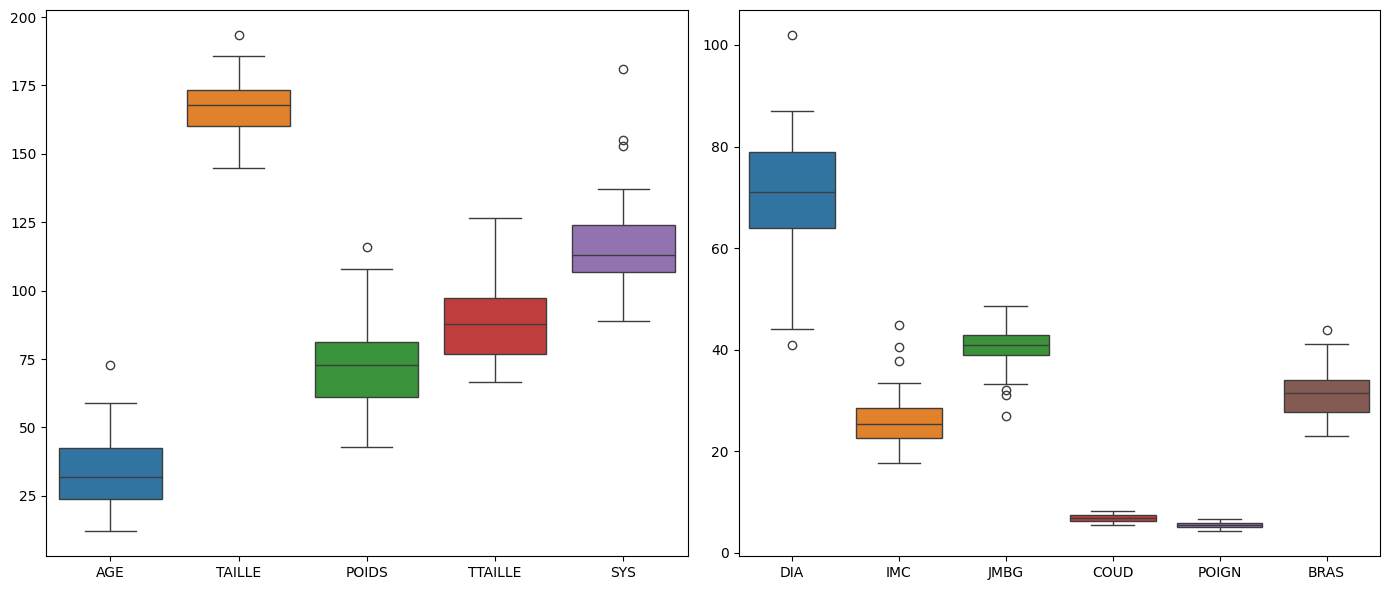

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=dataF[['AGE', 'TAILLE', 'POIDS', 'TTAILLE', 'SYS']], ax=ax[0])
sns.boxplot(data=dataF[['DIA', 'IMC', 'JMBG', 'COUD', 'POIGN', 'BRAS']], ax=ax[1])

plt.tight_layout()

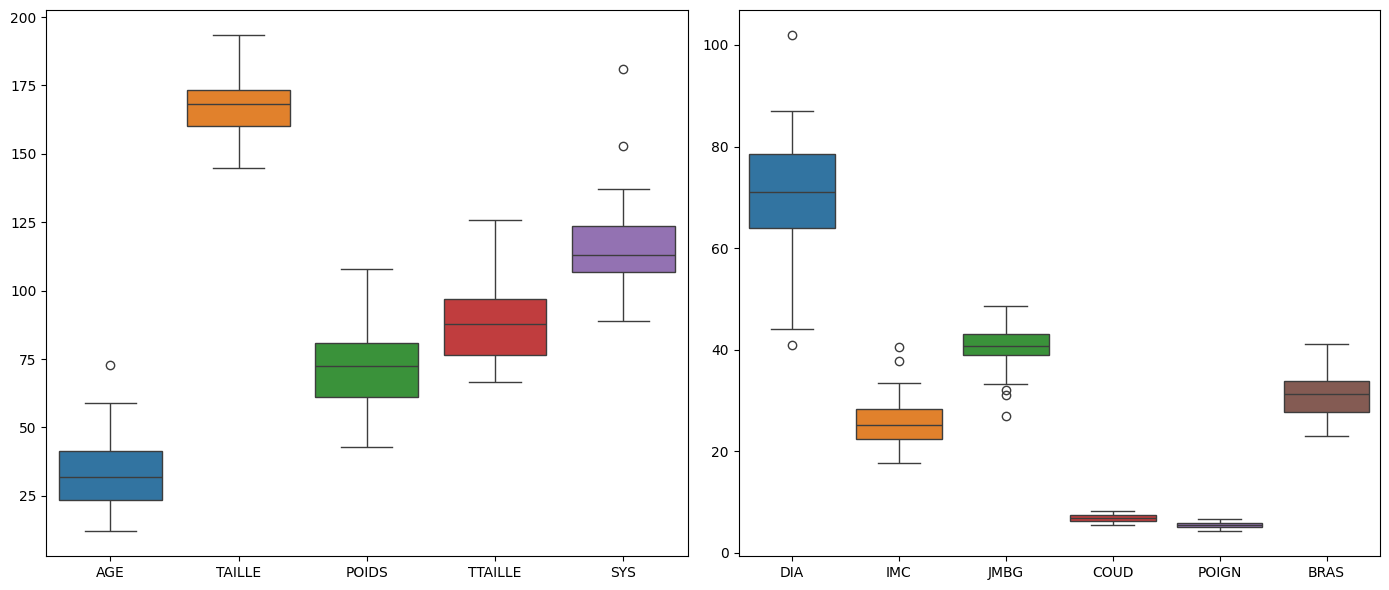

In [7]:
def remove_outlier(dataF, column):
    Q1 = dataF[column].quantile(0.25)
    Q3 = dataF[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_filtered = dataF[(dataF[column] >= lower_limit) & (dataF[column] <= upper_limit)]
    return df_filtered


for column in dataF.columns:
    df = remove_outlier(dataF, column)


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df[['AGE', 'TAILLE', 'POIDS', 'TTAILLE', 'SYS']], ax=ax[0])
sns.boxplot(data=df[['DIA', 'IMC', 'JMBG', 'COUD', 'POIGN', 'BRAS']], ax=ax[1])

plt.tight_layout()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

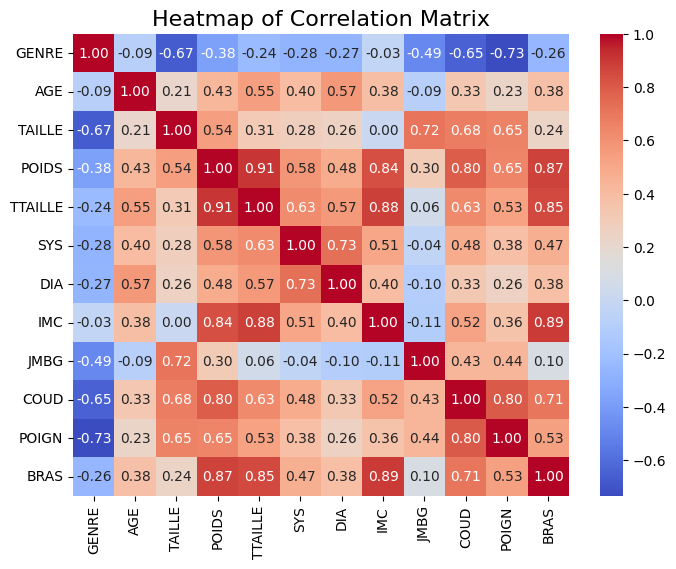

In [8]:
corr_matrix = dataF.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Heatmap of Correlation Matrix", fontsize=16)

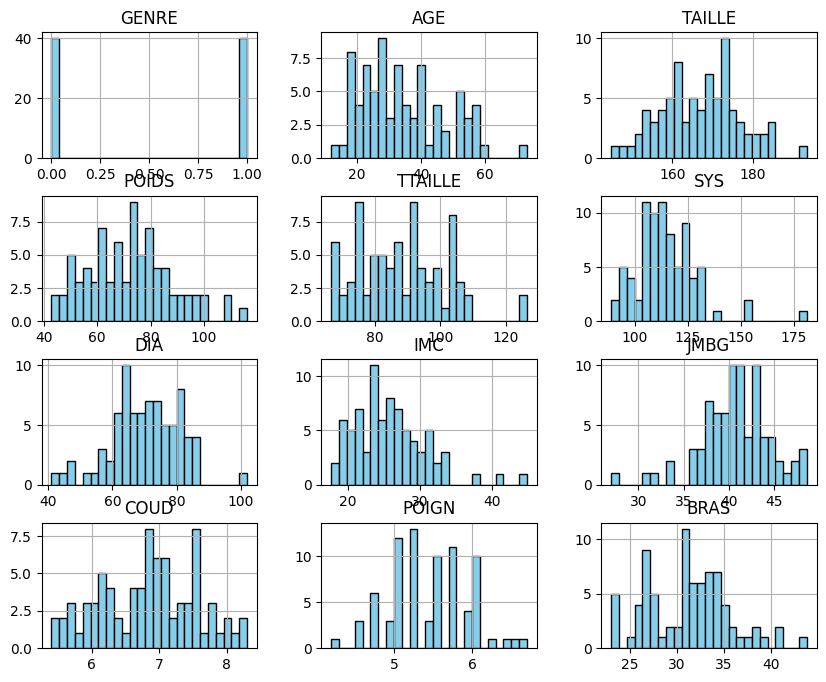

In [9]:
dataF.hist(figsize=(10, 8), bins=25, color='skyblue', edgecolor='black')
plt.show()